In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Datasets/HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Data Pre-Processing

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.drop('B', axis=1, inplace=True)

### 1. Duplicate Data

In [7]:
df.duplicated().sum()   # No duplicated here

np.int64(0)

### 2. Missing Values

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].median(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\521682831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\521682831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df_clean = df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


### 3. Outliers

In [12]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.479140,8.570832,0.00632,0.083235,0.253715,2.808720,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.000000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.900000,18.100000,27.7400
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,506.0,68.845850,27.486962,2.90000,45.925000,76.800000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\2538262764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[columns])
C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9052\2538262764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[columns])
C:\Users\Tarun Singh\A

<function matplotlib.pyplot.show(close=None, block=None)>

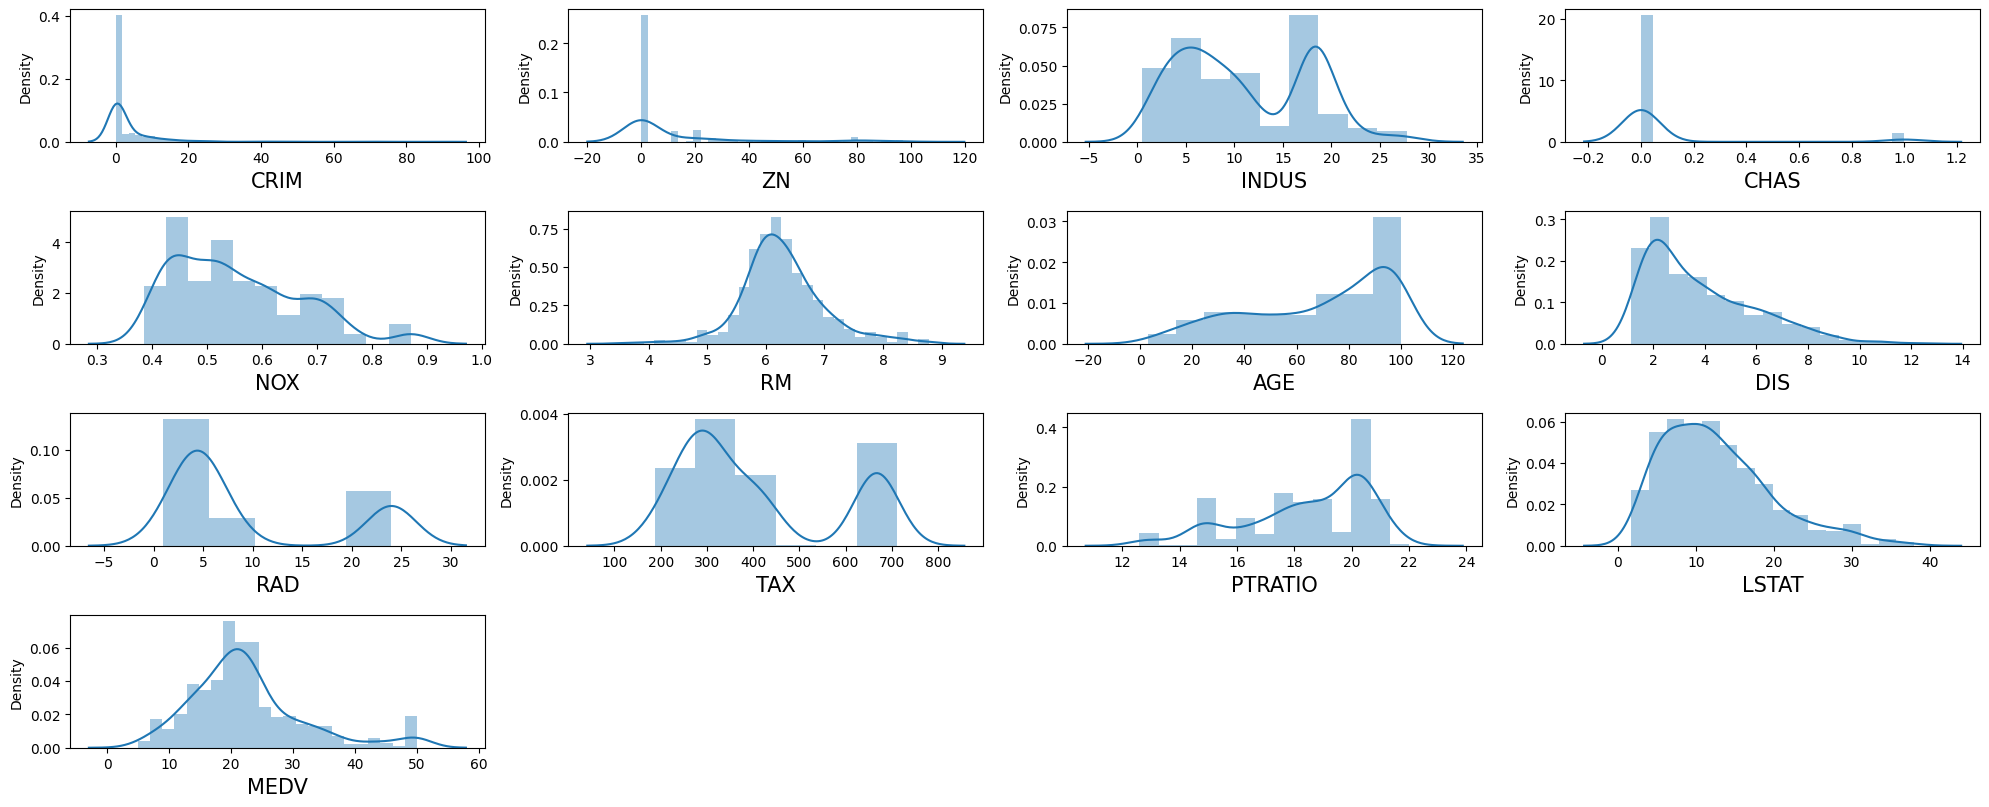

In [13]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_clean.columns):
        plt.subplot(20, 4, plotnum)
        sns.distplot(df_clean[columns])
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

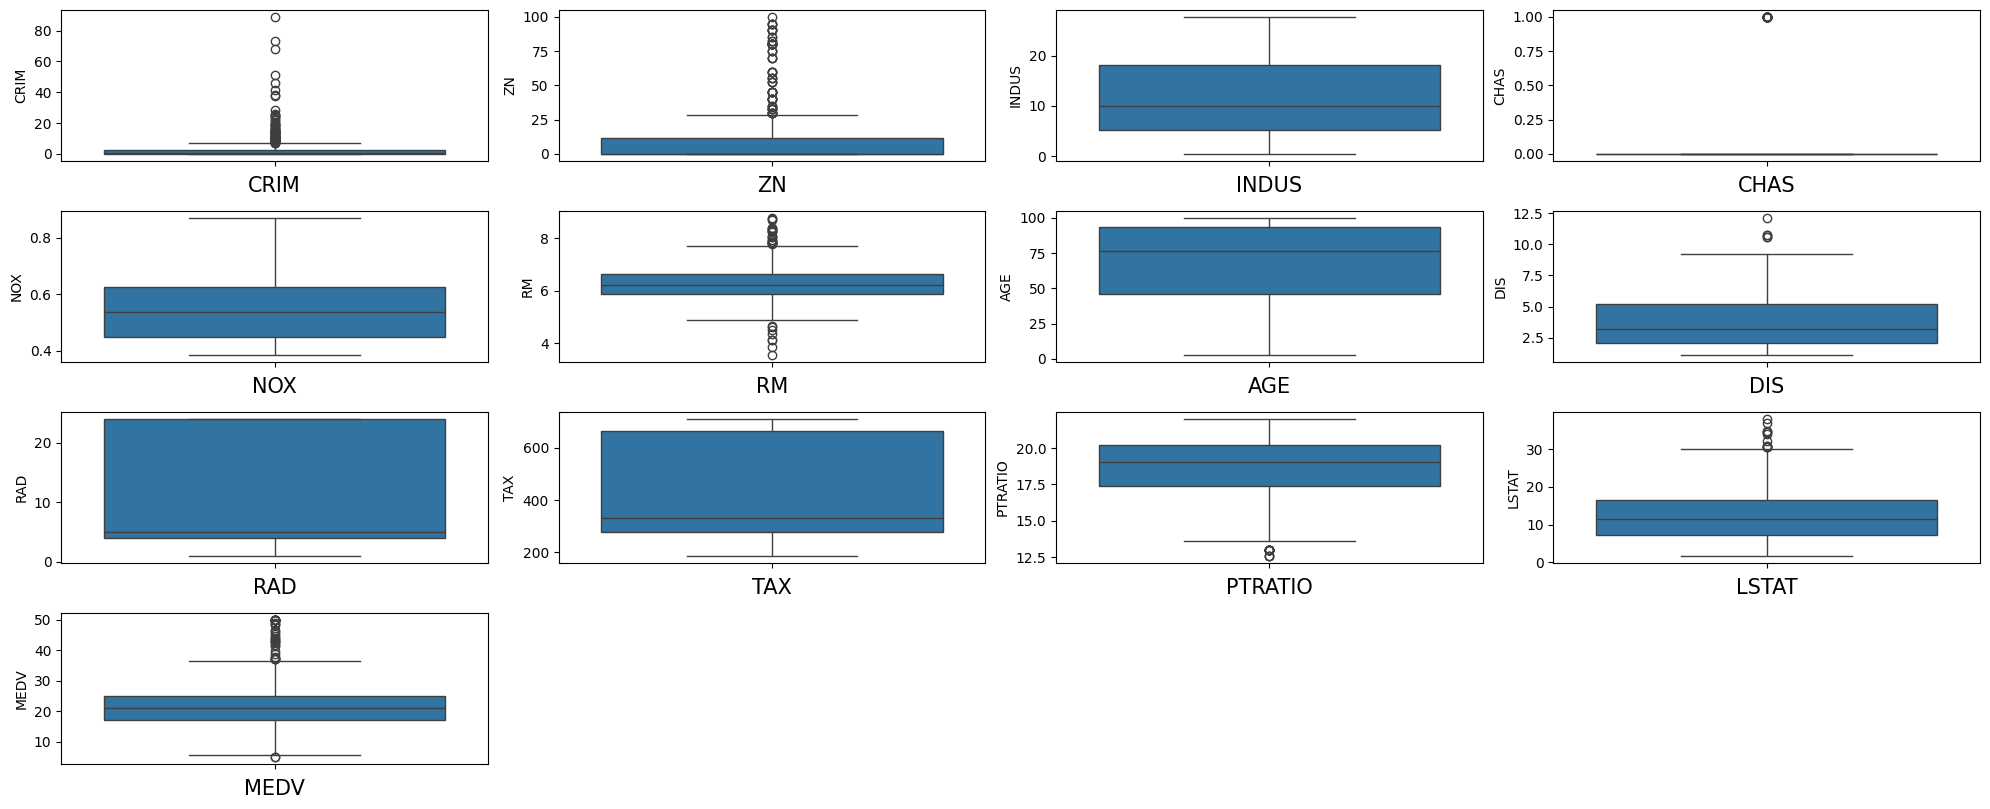

In [14]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_clean.columns):
        plt.subplot(20, 4, plotnum)
        sns.boxplot(df_clean[columns])
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

In [15]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # To get all outliers of data
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    # To get all data without outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) | (df_clean[col] <= upper_bound)]


In [16]:
outliers_counts = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True))
print(outlier_counts)

{'CRIM': 81, 'ZN': 68, 'INDUS': 0, 'CHAS': 34, 'NOX': 0, 'RM': 30, 'AGE': 0, 'DIS': 5, 'RAD': 0, 'TAX': 0, 'PTRATIO': 15, 'LSTAT': 12, 'MEDV': 40}


In [17]:
df_clean = df_clean.reset_index()

In [18]:
df_clean.drop('index', axis=1, inplace=True)
df_clean.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

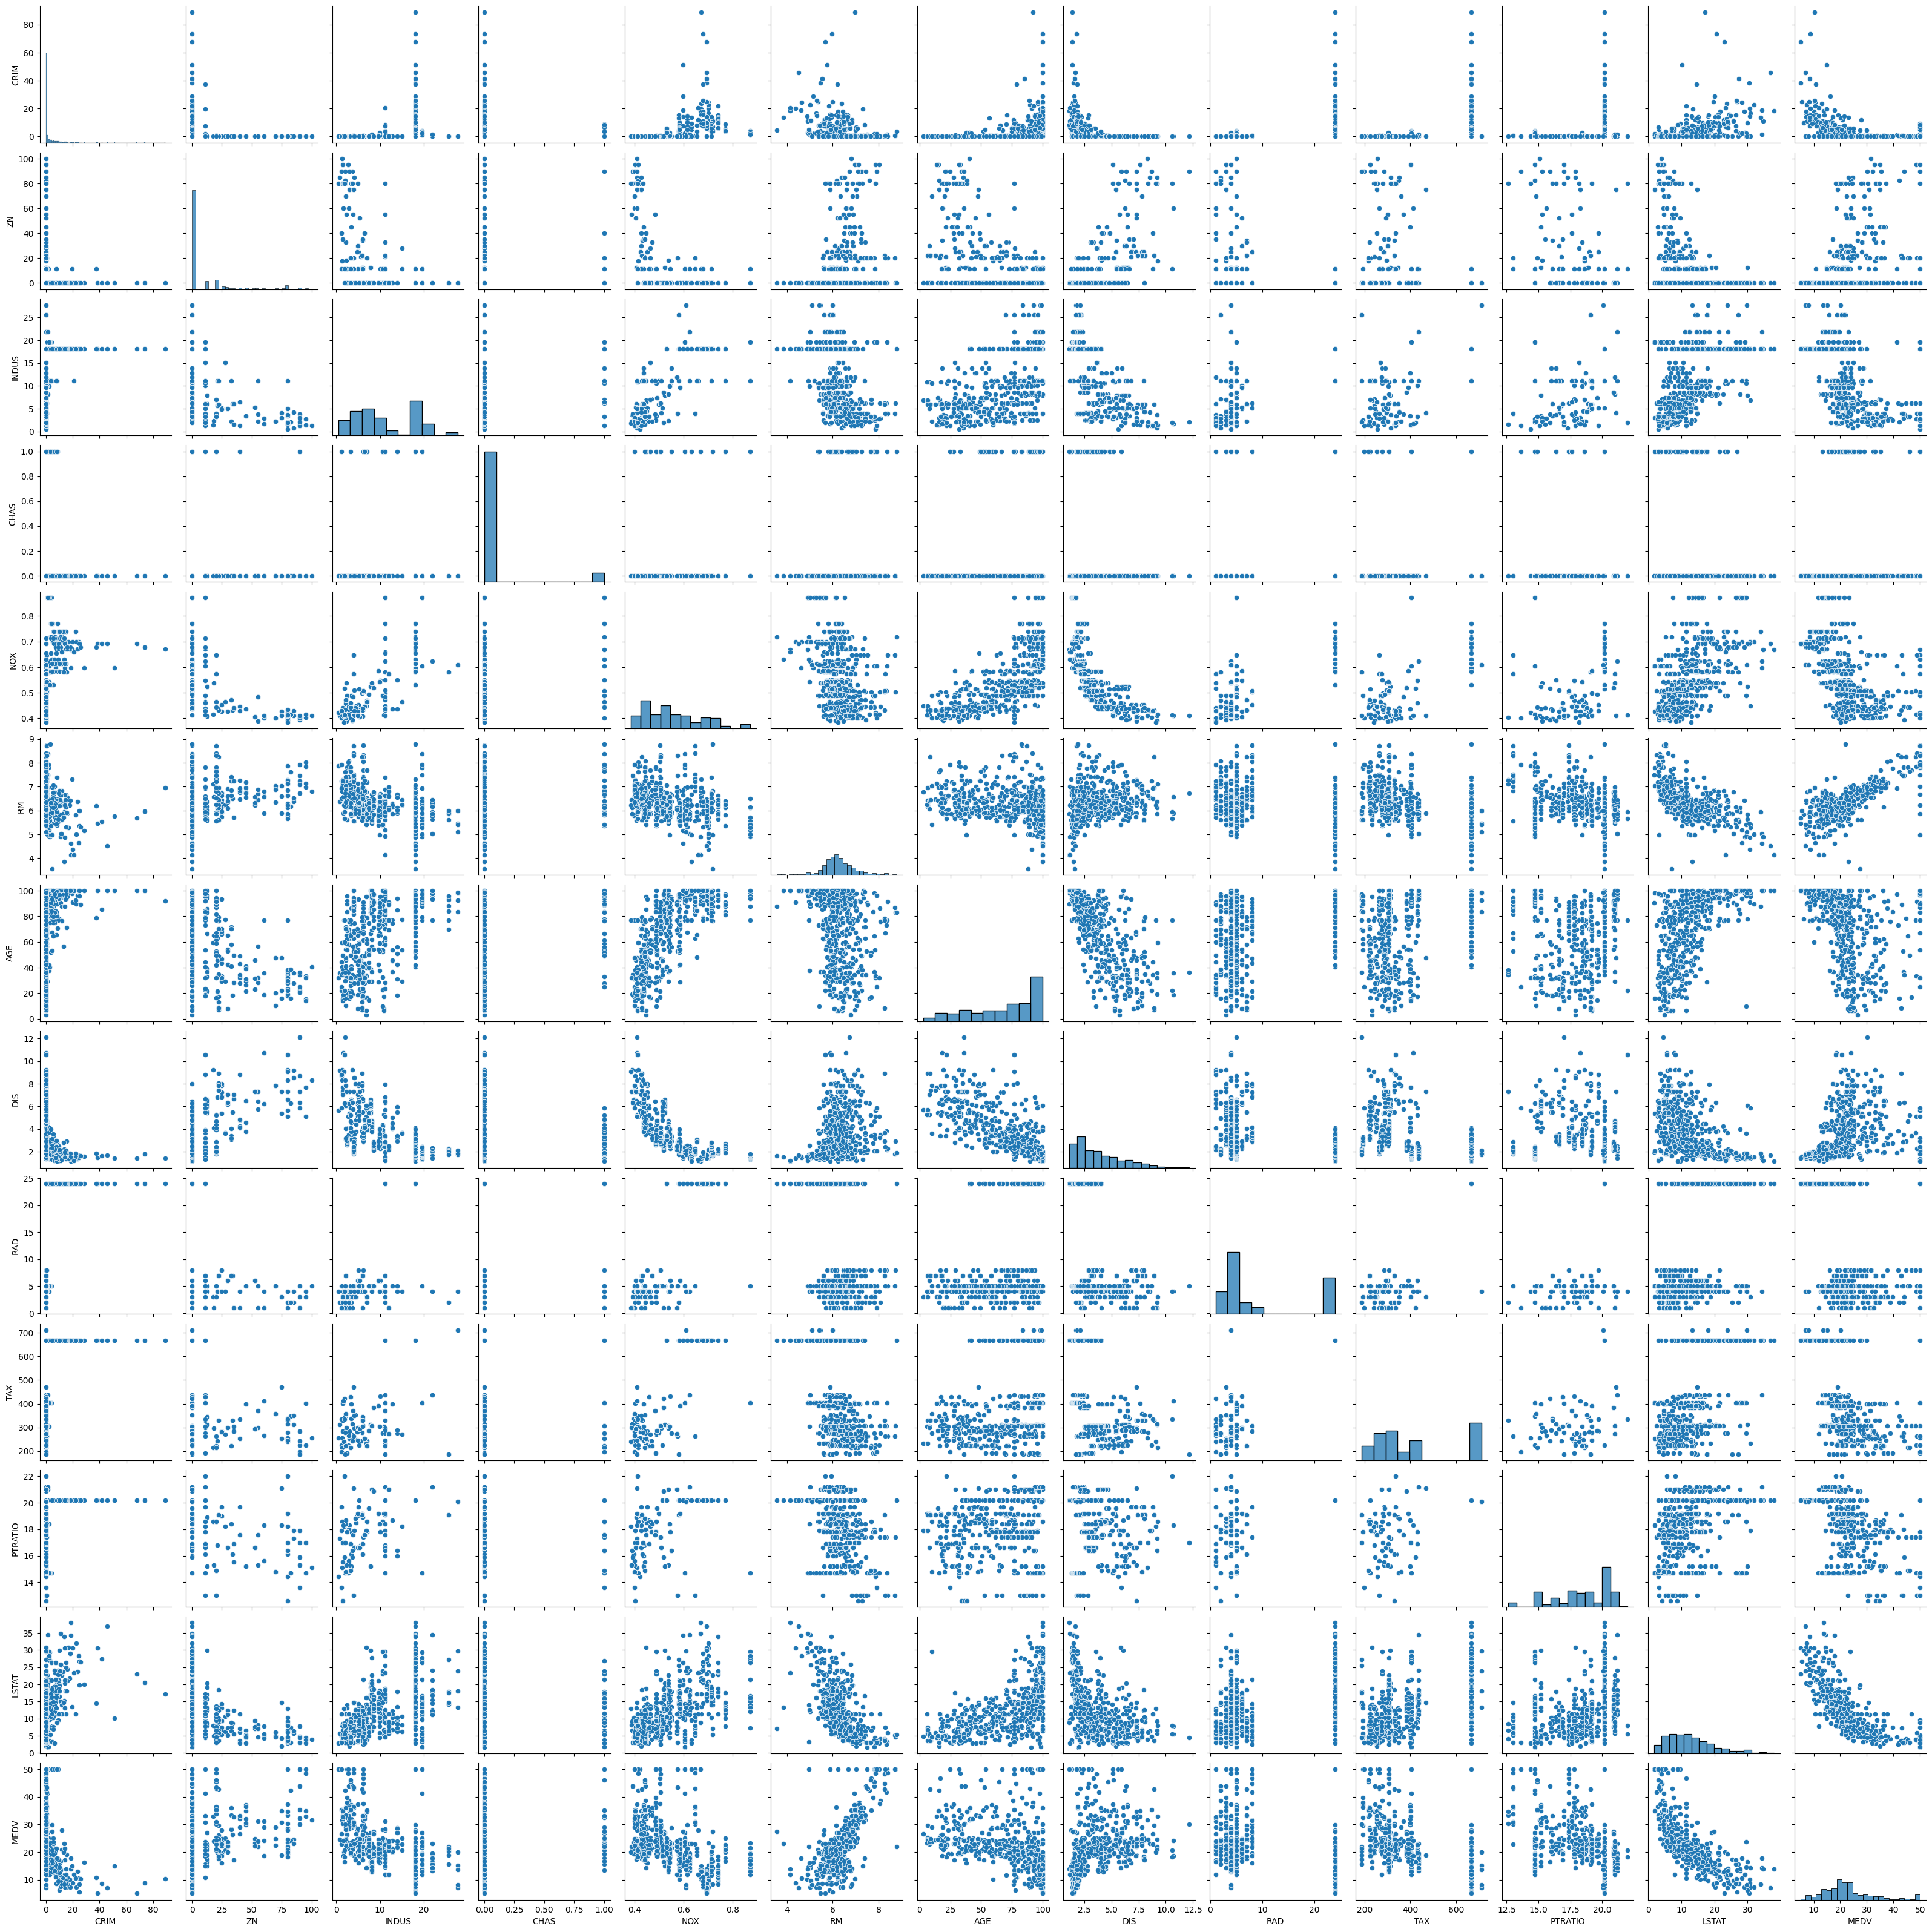

In [19]:
sns.pairplot(df_clean)

### Using Log Transformation

In [20]:
skewed_feature = ['CRIM', 'ZN', 'DIS', 'RAD', 'LSTAT', 'TAX']
for col in df_clean:
    df_clean[col] = np.log1p(df_clean[col])

### Get the correlation between features

<Axes: >

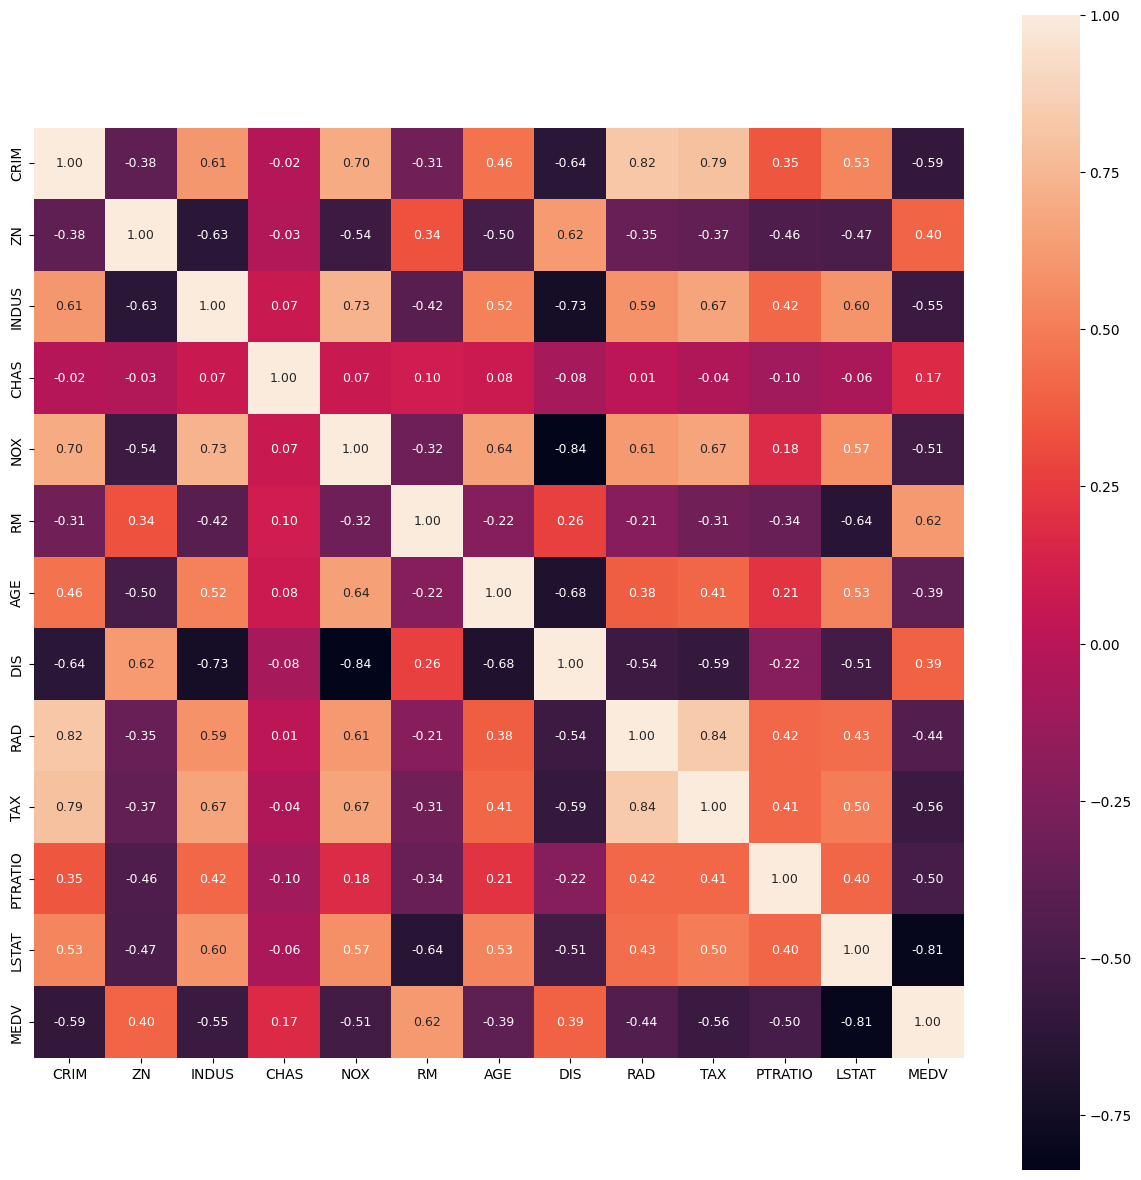

In [21]:
colu = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

corr = df_clean[colu].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt='.2f', cbar=True, square=True, annot=True, annot_kws={'size':9})

### Split the data into x, y

In [22]:
x = df_clean.drop(columns=['MEDV'], axis=1)
y = df_clean.MEDV

### Standardization
Because the algorithms will greatly affect the units and range of values (scale) of the changes.

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [25]:
print(f"x shape  :  {x_scaled.shape}")
print(f"y shape  :  {y.shape}")

x shape  :  (506, 12)
y shape  :  (506,)


### Split x and y into train and test

In [26]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Modeling

### Train the model

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Test the model

In [28]:
y_predict = model.predict(x_test)

# Evaluate the model:

In [29]:
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predict)

In [30]:
print("Model Evaluate Matrics")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared Score (R²): {R2:.2f}")

Model Evaluate Matrics
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared Score (R²): 0.79


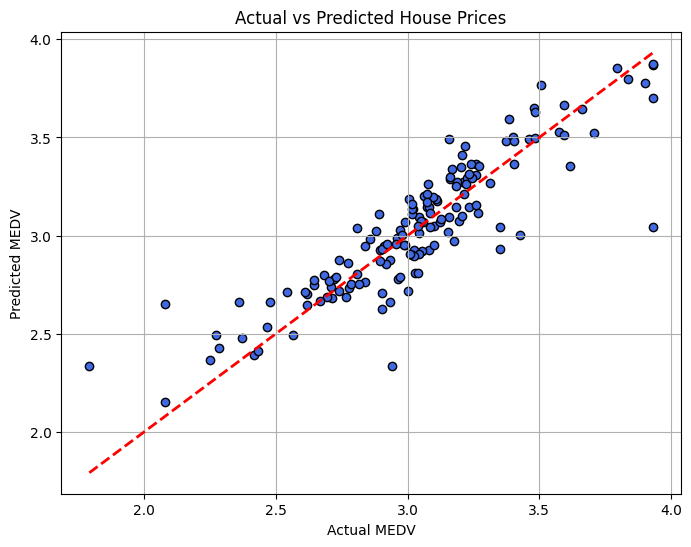

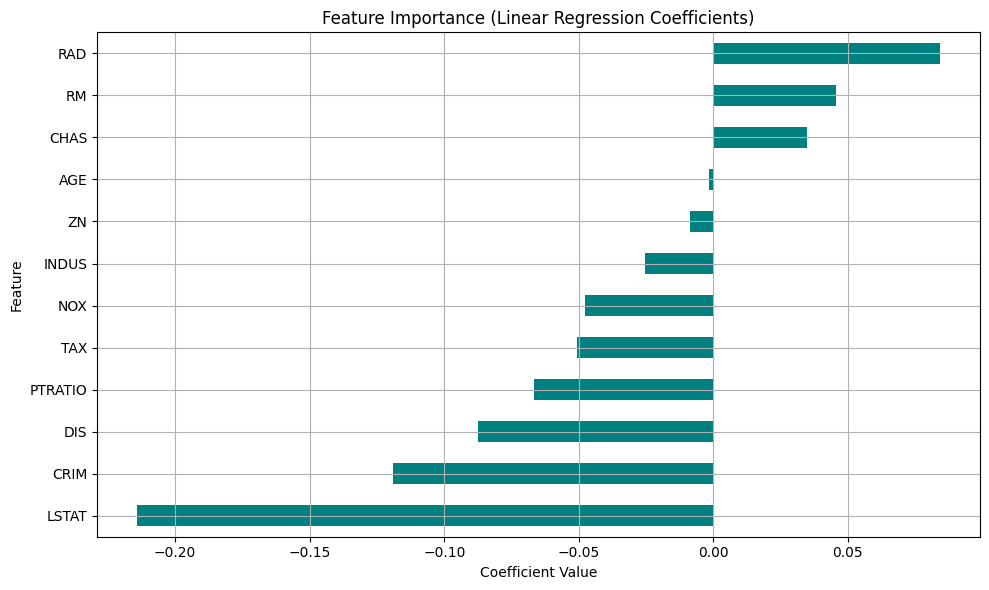

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# ===== Analyze the model parameters (the effect of each feature on the MEDV) =====
coefficients = pd.Series(model.coef_, index=x.columns)
coefficients = coefficients.sort_values()

# Bar plot of the most important effects
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='teal')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()